Anindya De 23943772

DSCI 100 
Final Group Project

# How To Make A Chart Topper 

## 1. Introduction

### 1.1 Background

Spotify is the most popular audio streaming service today for music. After launching in 2008 it now boasts over 50 million tracks and billions of weekly streams. It is available in 79 different countries with 217 million users, and in 2019 Spotify reported revenue of $7.44 billion dollars (USD). Because of Spotify's widespread global popularity, it is a perfect location to discover the most popular music among the general public, and subsequently learn why those songs are so appealing. 


### 1.2 Question

Our research question that we hope to answer by reading and  analyzing the data is, how can a song’s level of energy (on a scale from 1-100 depending on how energetic a song is), and loudness (in decibels) be used to predict a song’s popularity on Spotify?


### 1.3 The Dataset 

Our dataset is from Kaggle and consists of the most popular songs on Spotify each year from 2010 to 2019 and multiple technical and qualitative variables of a song. The data is gathered using a function made by Spotify called Organize Your Music. Organize Your Music is an algorithm created by Spotify as a means to sort user’s music into cohesive playlists. The variables used in this algorithm are the variables that appear in the dataset. This selection variables were created and chosen by Spotify to uniquely classify and characterize its product. Spotify is a multibillion dollar streaming service and since these were the variables created and chosen to accurately categorize this service’s product then these variables must be significant and reliable. As such they are the best and the most descriptive factors that we could use to predict a song’s popularity. 


## 2. Methodology

### 2.2 Cleaning The Dataset

First, we have selected the qualitative variables by using the select() function for cleaning the data. 

In [25]:
library(tidyverse) 
library(dplyr)
library(gridExtra)
library(repr)  
library(digest)
library(GGally)
library(caret)

### 2.1 Loading The Dataset

We had to move the dataset into Google drive and read the html form of the source code using read_csv function. After we successfully loaded the dataset, we have 15 columns including the titles of the songs and many quantitative variables that will be used as our predictive variables to predict correlation with popularity. 

In [26]:
## Loading the data set:
spotify_original_data <- read_csv("https://drive.google.com/uc?export=download&id=1h8isTz0sEj-HflMdQ7fuf-K8wlIRroML")
head(spotify_original_data)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  title = col_character(),
  artist = col_character(),
  `top genre` = col_character(),
  year = col_double(),
  bpm = col_double(),
  nrgy = col_double(),
  dnce = col_double(),
  dB = col_double(),
  live = col_double(),
  val = col_double(),
  dur = col_double(),
  acous = col_double(),
  spch = col_double(),
  pop = col_double()
)


X1,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77


### 2.2 Cleaning and wrangling the Data
1. We got rid of spaces in the names of the columns

In [27]:
colnames(spotify_original_data) <- make.names(colnames(spotify_original_data))
colnames(spotify_original_data)

[1] "X1"        "title"     "artist"    "top.genre" "year"      "bpm"      
 [7] "nrgy"      "dnce"      "dB"        "live"      "val"       "dur"      
[13] "acous"     "spch"      "pop"

2. Here we selected the variables that had the highest correlation coefiecent together. (r = .568)

In [28]:
spotify <- select(spotify_original_data, title, pop, nrgy, dB)
head(spotify)

title,pop,nrgy,dB
<chr>,<dbl>,<dbl>,<dbl>
"Hey, Soul Sister",83,89,-4
Love The Way You Lie,82,93,-5
TiK ToK,80,84,-3
Bad Romance,79,92,-4
Just the Way You Are,78,84,-5
Baby,77,86,-5


### 2.3 Creating a Categorical Variable

Here we change popularity into categories from numerical values, (top 33% middle 33% and bottom 33% ) These three catagories will be how we predict how popular a song will be. One thing to note is that “popularity,” our response variable is scaled from 1-100 depending on the number of plays of the song on Spotify, with 100 being the most plays. To make this a categorical variable, we have used the cut function in R to separate a song’s popularity into 3 categories: "Low Popularity", "Normal Popularity", "High Popularity." Low popularity is popularity from [-1,33.33], normal popularity is (33.33,66.66], and high popularity is (66,inf). Now, the variable name is “pop_category”.

In [29]:
spotifydata <- spotify %>%
    mutate(pop_category = cut(pop, breaks=c(-1,33.33,66.66,Inf), labels=c("Low Popularity","Normal Popularity","High Popularity")))%>%
    select(-pop)

head(spotifydata)



title,nrgy,dB,pop_category
<chr>,<dbl>,<dbl>,<fct>
"Hey, Soul Sister",89,-4,High Popularity
Love The Way You Lie,93,-5,High Popularity
TiK ToK,84,-3,High Popularity
Bad Romance,92,-4,High Popularity
Just the Way You Are,84,-5,High Popularity
Baby,86,-5,High Popularity


Here we checked the vectors that were created by categorizing the column "Popularity"

In [30]:
spotify_vectors <- spotifydata %>%
    select(pop_category)%>%
    unlist()%>%
    levels()
    
spotify_vectors

[1] "Low Popularity"    "Normal Popularity" "High Popularity"

### 2.4 Exploring the data 

We used nrow() to see how many rows are fitting in each of pop_categories. We were also able to check out the result of scatter plot using the whole dataset using ggplot() to make a rough prediction.


In [31]:
obs <- nrow(spotifydata)
spotifydata %>%
    group_by(pop_category)%>%
    summarize(n = n(), percentage = n() / obs * 100)

pop_category,n,percentage
<fct>,<int>,<dbl>
Low Popularity,18,2.985075
Normal Popularity,232,38.474295
High Popularity,353,58.540630


### 2.5 Visualization 1

Here we visualized the data to see its trajectory, patern, and how the categories are represented. As you can see, the data is quite random, with little correlation between the categories, and with the "Low Popularity" category being grossly underrepresented. 

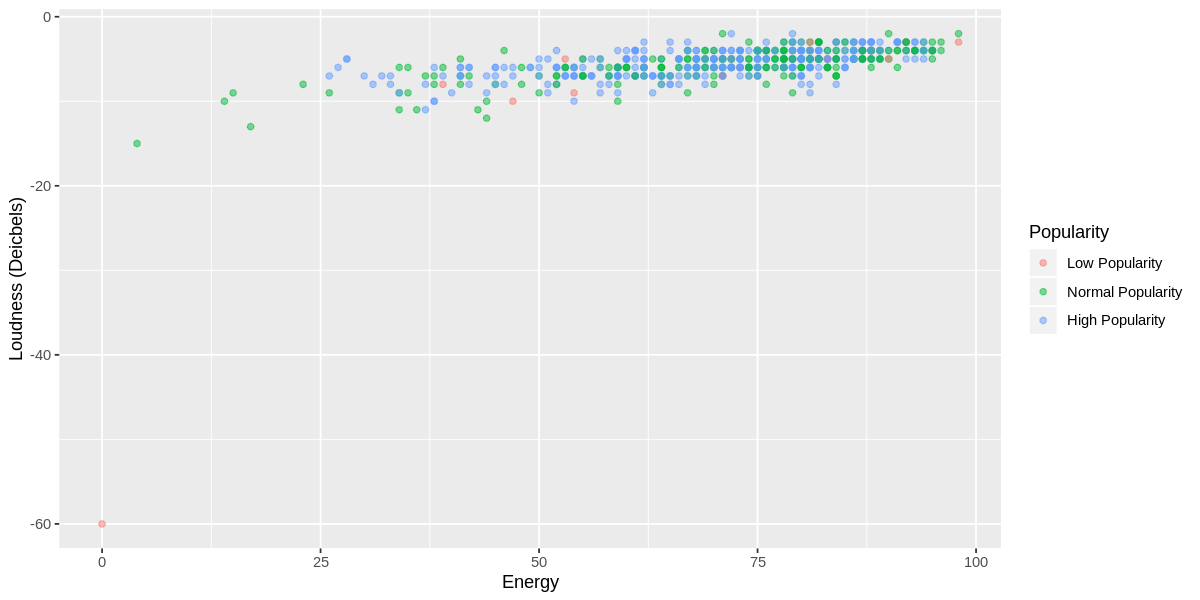

In [32]:

perim_spotify <- spotifydata %>%  
  ggplot(aes(x = nrgy, y = dB, color = pop_category)) + 
    geom_point(alpha = 0.5) +
    labs(x = "Energy", y = "Loudness (Deicbels)", color = "Popularity")
perim_spotify

### 2.6 Standardization

Using preProcess() enabled us to standardize the data. From this point, we have scaled data. We specified the center (0) and scale (1) and applied the data transformation to the dataset with predict() function.

In [33]:
scale_transformer <- preProcess(spotifydata, method = c("center", "scale")) 
spotify_scaled <- predict(scale_transformer,spotifydata)

head(spotify_scaled)

title,nrgy,dB,pop_category
<chr>,<dbl>,<dbl>,<fct>
"Hey, Soul Sister",1.1339731,0.5642464,High Popularity
Love The Way You Lie,1.3792114,0.2068508,High Popularity
TiK ToK,0.8274252,0.9216419,High Popularity
Bad Romance,1.3179018,0.5642464,High Popularity
Just the Way You Are,0.8274252,0.2068508,High Popularity
Baby,0.9500443,0.2068508,High Popularity


### 2.5 Visualization 2

Here we plotted the scaled and unscaled data side by side to see the effect scaling the data has created.

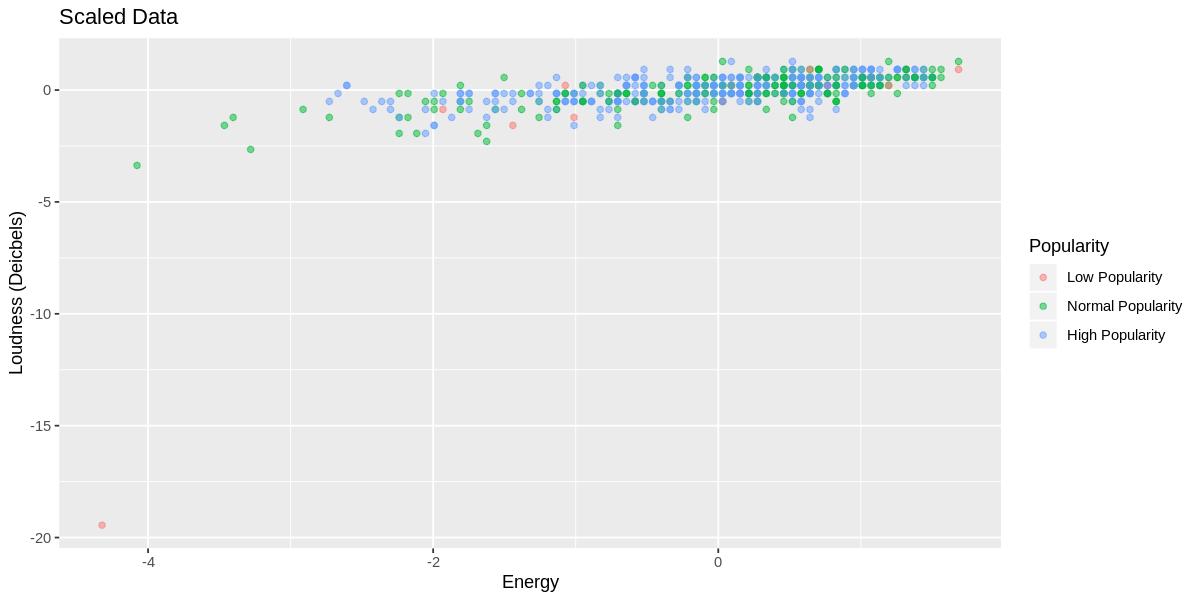

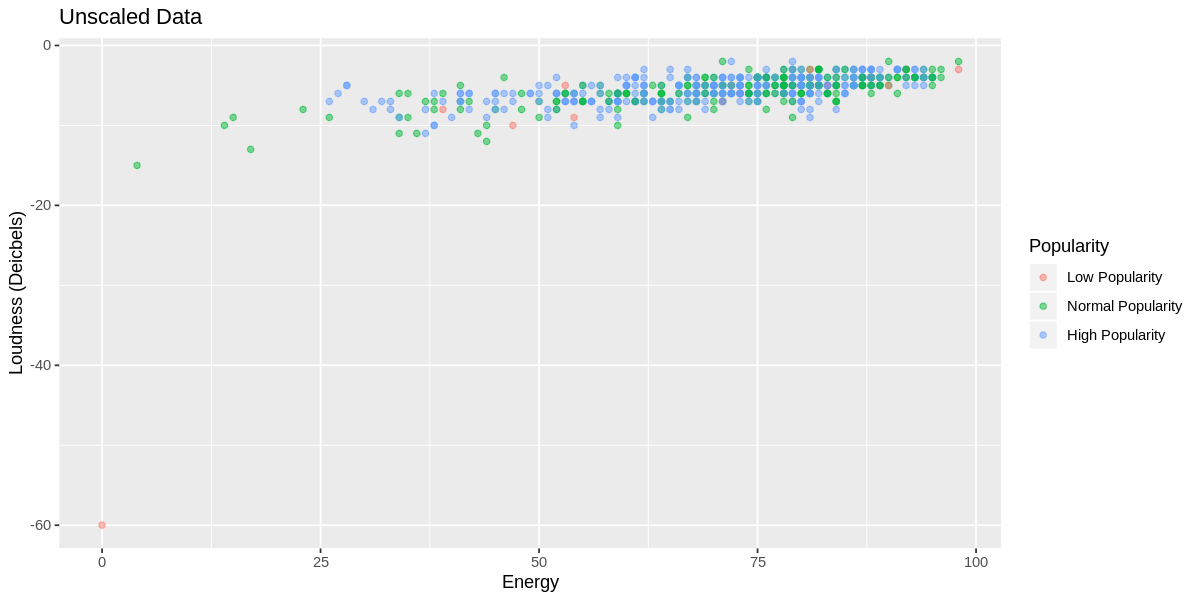

In [34]:
options(repr.plot.width = 10, repr.plot.height = 5) 

spotify_scaled_plot <- spotify_scaled %>%  
  ggplot(aes(x = nrgy, y = dB, color = pop_category)) + 
    geom_point(alpha = 0.5) +
    labs(x = "Energy", y = "Loudness (Deicbels)", color = "Popularity") +
    ggtitle("Scaled Data")
spotify_scaled_plot

spotify_unscaled_plot<- perim_spotify +
    ggtitle("Unscaled Data")
spotify_unscaled_plot

### 2.6 Balancing The Data

Here we balanced the data so that each of our categories are equally represented in our future model.

In [35]:
spotify_balanced <- upSample(x = select(spotifydata, nrgy, dB),
            y = select(spotifydata, pop_category) %>% unlist())
spotify_balanced %>% 
    group_by(Class) %>%
    summarize(n = n())

Class,n
<fct>,<int>
Low Popularity,353
Normal Popularity,353
High Popularity,353


### 2.7 Splitting the Dataset

1. First we take a random 75% of our balanced data and place it into our training set, here named "set_rows." This will be proportional to the different levels of popularity we specified.

In [12]:
set.seed(4567)
set_rows <- spotify_balanced %>% 
  select(Class) %>% 
  unlist() %>% 
  createDataPartition(p = 0.75, list = FALSE)
head(set_rows)

Resample1
1
2
3
4
5
8


2. Next, we will use the "slice" function to take the rows from the dataframe we just created and place them into training and testing sets in a way that they won't affect the results of each other. 

In [13]:
set.seed(4567)
training_set <- spotify_balanced %>% slice(set_rows)
test_set <- spotify_balanced %>% slice(-set_rows)
glimpse(training_set)
glimpse(test_set)

Observations: 795
Variables: 3
$ nrgy  <dbl> 90, 98, 88, 88, 81, 92, 78, 54, 53, 39, 71, 81, 47, 0, 72, 54, …
$ dB    <dbl> -5, -3, -4, -4, -4, -3, -5, -9, -5, -8, -7, -3, -10, -60, -5, -…
$ Class <fct> Low Popularity, Low Popularity, Low Popularity, Low Popularity,…
Observations: 264
Variables: 3
$ nrgy  <dbl> 83, 72, 73, 73, 47, 81, 73, 73, 88, 0, 92, 73, 0, 88, 98, 81, 7…
$ dB    <dbl> -5, -5, -6, -6, -10, -4, -6, -6, -4, -60, -3, -6, -60, -4, -3, …
$ Class <fct> Low Popularity, Low Popularity, Low Popularity, Low Popularity,…


In [14]:
head(training_set)
head(test_set)

nrgy,dB,Class
<dbl>,<dbl>,<fct>
90,-5,Low Popularity
98,-3,Low Popularity
88,-4,Low Popularity
88,-4,Low Popularity
81,-4,Low Popularity
92,-3,Low Popularity


nrgy,dB,Class
<dbl>,<dbl>,<fct>
83,-5,Low Popularity
72,-5,Low Popularity
73,-6,Low Popularity
73,-6,Low Popularity
47,-10,Low Popularity
81,-4,Low Popularity


3. Here we scaled the data set as to center the predictors in our model and to ensure that the testing data doesn't interfere with our results.

In [15]:
scale_transformer <- preProcess(training_set, method = c("center", "scale")) 
training_set <- predict(scale_transformer, training_set)
test_set <- predict(scale_transformer, test_set)

### 2.8 Cross Validation

Here we specified what are predictive variables and our classifications are going to be within the X_train and Y_train representing them respectively. We set the seed so that the random assignments of data that we used can be reproduced. We are looking at the results of all the k's in dataframe with a range of 1 to 50 to see which k value fits the data best for this large dataset. Then we will create our classifier by the use of the train() function so that we can find the k with the best accuracy, which in this case is k = 1. We will discuss the issues with this later on in the results and discussion sections. 

In [16]:
set.seed(4567)

X_train <- training_set %>% 
  select(dB, nrgy) %>% 
  data.frame()
Y_train <- training_set %>% 
  select(Class) %>% 
  unlist()
head(X_train)
head(Y_train)

set.seed(4567)

ks = data.frame(k = 1:50)

train_control<-trainControl(method= "cv", number = 10)
choose_k<- train(x = X_train, y = Y_train, method = "knn", tuneGrid= ks, trControl = train_control)
choose_k

dB,nrgy
<dbl>,<dbl>
0.1966901,1.0306285
0.4867988,1.4537644
0.3417445,0.9248446
0.3417445,0.9248446
0.3417445,0.5546007
0.4867988,1.1364125


Class1         Class2         Class3         Class4         Class5 
Low Popularity Low Popularity Low Popularity Low Popularity Low Popularity 
        Class6 
Low Popularity 
Levels: Low Popularity Normal Popularity High Popularity

k-Nearest Neighbors 

795 samples
  2 predictor
  3 classes: 'Low Popularity', 'Normal Popularity', 'High Popularity' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 716, 714, 715, 717, 714, 717, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   1  0.7123028  0.56842080
   2  0.7058802  0.55879898
   3  0.6882038  0.53229130
   4  0.6717754  0.50767725
   5  0.6605222  0.49078724
   6  0.6427195  0.46404551
   7  0.6176990  0.42647342
   8  0.6024766  0.40369993
   9  0.5985988  0.39797673
  10  0.5861265  0.37928147
  11  0.5735933  0.36051310
  12  0.5545525  0.33205485
  13  0.5408326  0.31151952
  14  0.5347230  0.30217105
  15  0.5285173  0.29280099
  16  0.5246257  0.28693442
  17  0.5233745  0.28503568
  18  0.5156683  0.27342966
  19  0.4979744  0.24684103
  20  0.5044951  0.25668201
  21  0.4970085  0.24542283
  22  0.4944615  0.24164097
  23  0.5007115  0.25100839
  24  0.4919761  0.23808750
  25  0.4805983  

In [17]:
k_accuracies <- choose_k$results %>%
                    select(k, Accuracy)
head(k_accuracies)

k,Accuracy
<int>,<dbl>
1,0.7123028
2,0.7058802
3,0.6882038
4,0.6717754
5,0.6605222
6,0.6427195
7,0.6176990
8,0.6024766
9,0.5985988


Here we will visualize all the k values we tested in a line and point plot so that we can visually assess which is the best k value for this model.

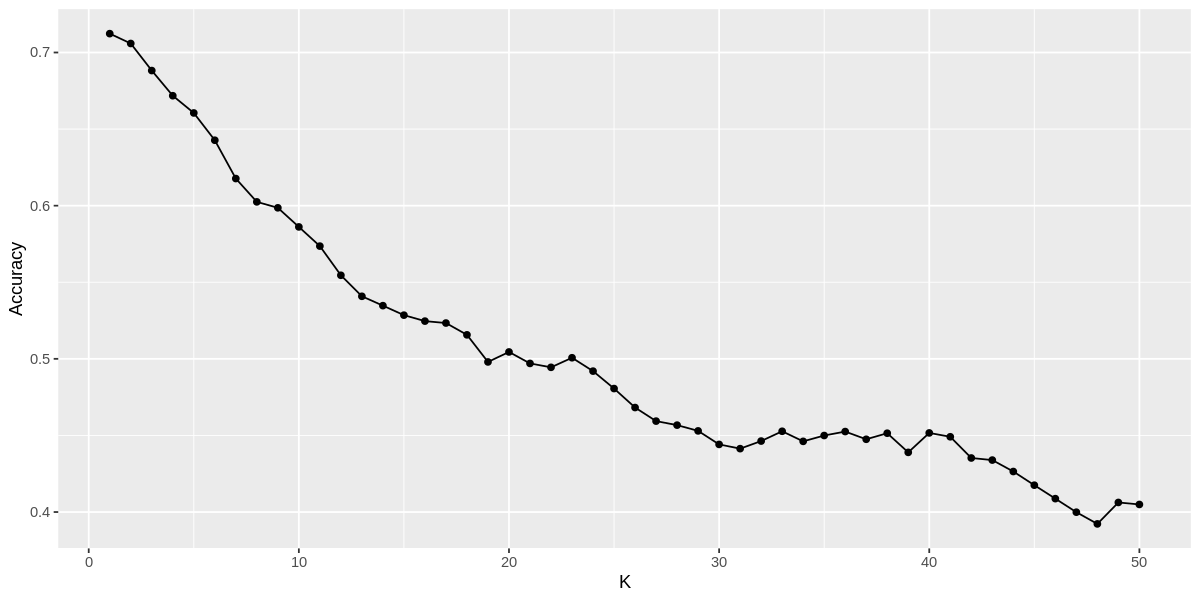

In [18]:
k_plot <- ggplot(k_accuracies, aes(x = k, y = Accuracy))+
                geom_point()+
                geom_line()+
                labs(x = "K", y = "Accuracy")
k_plot

### 2.9 Testing the Accuracy of the Model

Finally we will use our untouched test data to assess the accuracy of the model that we have created. 

Here we are retraining our classifier to the options that gave it the best results. (i.e. fitting it to k = 1)

In [19]:
set.seed(4567)
final_k = data.frame(k = 1)
classifier_final <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = final_k)
classifier_final

k-Nearest Neighbors 

795 samples
  2 predictor
  3 classes: 'Low Popularity', 'Normal Popularity', 'High Popularity' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 795, 795, 795, 795, 795, 795, ... 
Resampling results:

  Accuracy   Kappa    
  0.7103994  0.5649489

Tuning parameter 'k' was held constant at a value of 1

Here we use our retrained classifier to predict the popularity levels of the test set, and then gage the accuracy of our model.

In [20]:
set.seed(4567)
X_test <- test_set %>% 
    select(nrgy, dB) %>% 
    data.frame()
Y_test <- test_set %>% 
    select(Class) %>% 
    unlist()
test_pred <- predict(classifier_final, X_test)
results <- confusionMatrix(test_pred, Y_test)

results

Confusion Matrix and Statistics

                   Reference
Prediction          Low Popularity Normal Popularity High Popularity
  Low Popularity                 0                 1               2
  Normal Popularity             45                51              48
  High Popularity               43                36              38

Overall Statistics
                                          
               Accuracy : 0.3371          
                 95% CI : (0.2803, 0.3976)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 0.4711          
                                          
                  Kappa : 0.0057          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Low Popularity Class: Normal Popularity
Sensitivity                        0.00000                   0.5795
Specificity                        0.98295                   0.4716
Pos Pred Value              

As we can see the accuracy of our model of our model is quite bad with an accuracy level of .3371

## 3.0 Discussion

### 3.1 Summary of Results

We have built a k-nearest neighbours classification model that takes a song’s energy levels (how energetic a song is) and loudness (in decibels) to predict how popular the song will be on Spotify (low, normal, or high popularity).
A cross validation method was used on the model to ensure the most accurate k value is used to create the model, as well further training on the model was done to improve the classifier. Through these methods, we used k = 1, which gives our model a final accuracy of 0.71 on the training data set.
Using k = 1 is problematic as it overfits the data and is a sign of a lack of correlation of the classification clusters.
This was seen when we used this classification model on the testing data set, and obtained an accuracy score of 0.33 proving that our data was too random to accurately predict the popularity of a given song based off of loudness and energy.

### 3.2 Conclusion

In conclusion, it is seen that the classification model is not accurate in predicting a song’s popularity on Spotify based on a song’s energy and loudness levels. 
This is what we expected though after the exploratory data analysis because through that we observed that there were no distinct classes in particular areas on the plot with energy on the x-axis and loudness on the y-axis. They were all very randomly scattered, which is what warned us that the classification model would likely not be very accurate. However, we still continued with using these 2 predictor variables because we looked at the ggpairs plot of every single variables correlation with the popularity, and energy and loudness were actually the variables with the highest correlation, which gave slight hope that maybe the classification might be somewhat accurate.


### 3.4 Impact

Despite the classification model not being accurate, these findings are actually very impactful. Due to the low accuracy of the model not being able to take a song’s energy and loudness to predict its popularity, it is seen that a song’s loudness and energy levels do not have a strong correlation to  a song’s popularity on Spotify. Furthermore, through the analysis of this project, it can be seen that a song does not have to adhere to specific energy and loudness levels to become popular on Spotify. 


### 3.5 Future Questions

A closely related future question that could be looked at could involve making regression models with these variables to determine a song’s popularity. Perhaps the regression model might be more accurate than the k nearest neighbours classification model. 
Another future question could be to get new data from different decades to see if there used to be stronger correlations between a song’s characteristics and its popularity in the past, because I do think that nowadays song’s are very different from one another and any song can get popular with the right timing and luck. Whereas in the past I think there are much more limitations on what a song must sound like for it to become popular. 


## 4.0 References

Henrique, L. (2019, December 26). Top Spotify songs from 2010-2019 - BY YEAR. Retrieved from https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year?fbclid=IwAR0qS-Cwmqfc1z3H7XHE6NSRH2mnY_-XWka9CZx38-eq85nuNiAXLJSwlek


DiFranza, A. (2019, October 7). Spotify: Big Data Shows Big Results. Retrieved from https://www.northeastern.edu/graduate/blog/spotify-big-data/

